In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras import layers,models


In [6]:
# Since we are allowed to use pretrained models 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import EfficientNetB0

model1 = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model2 = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
model3 = VGG16(weights='imagenet', include_top=False, pooling='avg')


I0000 00:00:1761243042.807917      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1761243042.808615      37 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
 # Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# CIFAR-10 class names
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

num_samples_per_class = 10
print(" CIFAR-10 dataset loaded successfully")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
 CIFAR-10 dataset loaded successfully


In [8]:
X_train = x_train / 255.0
X_test = x_test / 255.0

In [9]:
#creating own CNN model 
from tensorflow.keras import layers, models

cnn_embedding = models.Sequential([
    layers.InputLayer(shape=(32, 32, 3)),           
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    
])


In [10]:
cnn_embedding.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
cnn_embedding.fit(X_train, y_train, epochs=10)

Epoch 1/10


I0000 00:00:1761243116.108980     148 service.cc:148] XLA service 0x7a0484015910 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761243116.110423     148 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761243116.110444     148 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761243116.431263     148 cuda_dnn.cc:529] Loaded cuDNN version 90300


  59/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0728 - loss: 4.0523     

I0000 00:00:1761243119.328860     148 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.1079 - loss: 2.3998
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1238 - loss: 2.3057
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0989 - loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1003 - loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1003 - loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1009 - loss: 2.3026
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0995 - loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0997 - loss: 2.3026
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0999 - loss: 2.3026
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1007 - loss: 2.3026


the accuracy is very low , and loss is high . due to which I will use pre-trained models directly 

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input



def get_embeddings(images):

    images = tf.convert_to_tensor(images, dtype=tf.float32)
    images_resized = tf.image.resize(images, (224, 224))
    images_preprocessed = preprocess_input(images_resized)
    embeddings = model3.predict(images_preprocessed, verbose=0)
    return embeddings


After tring all models , VGG16 worked accurately compared to other models 

In [166]:
cat_class = 3
truck_class = 9

# Subset for Dataset A (cars)

dataset_A1 = x_train[y_train.flatten() == cat_class][:1] #  cat images
dataset_B1 = x_train[y_train.flatten() == cat_class][:2] #cat image
dataset_C1=x_train[y_train.flatten() == truck_class][:2] #truck image 


In [167]:
E_A1 = get_embeddings( dataset_A1)
E_B1 = get_embeddings(dataset_B1)
E_C1 = get_embeddings(dataset_C1)



In [168]:

similarity_matrix1 = cosine_similarity(E_A1, E_B1)
similarity_matrix2 = cosine_similarity(E_A1, E_C1)

In [169]:
# For each image in A, find max similarity in B
max_sim_A1= similarity_matrix1.max(axis=1)
max_sim_A2= similarity_matrix2.max(axis=1)





In [171]:
sim = similarity_matrix1[0, 1]
print(sim)
sim = similarity_matrix2[0, 0]
print(sim)

0.7429374
0.6203156


The below code is for finding similarity between each classses , even here I am directly using pre-trained model .

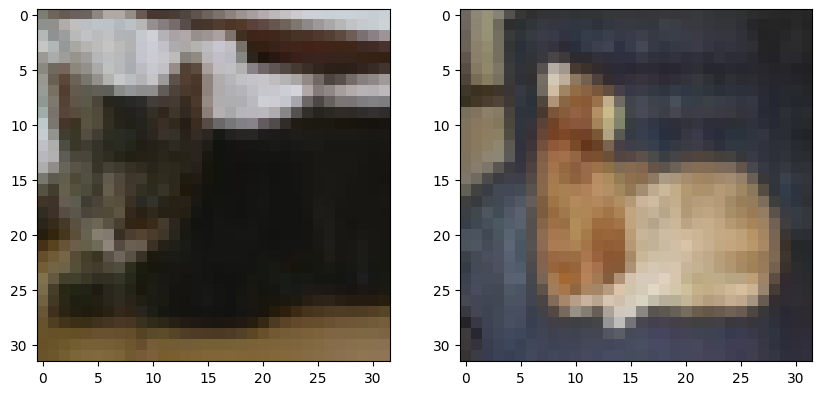

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(dataset_A1[0])
axes[1].imshow(dataset_B1[1])
plt.show()



Similarity = 0.7429374

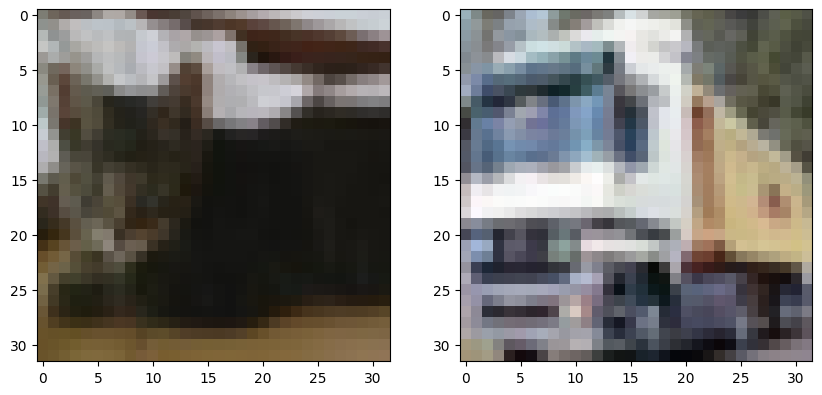

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(dataset_A1[0])
axes[1].imshow(dataset_C1[0])
plt.show()

Similarity =0.6203156

code  for semantic similarity between each classes

In [37]:
import numpy as np
x_test_float = x_test.astype("float32") #converting into array

subset_size = 100 #using only a subset of dataset 
x_subset = x_test_float[:subset_size]
y_subset = y_test[:subset_size]

embeddings = get_embeddings(x_subset) 


class_embeddings = {}

for c in range(len(class_names)):
    idx = np.where(y_test.flatten() == c)[0][:num_samples_per_class]
    if len(idx) == 0:
        continue
    x_subset = x_test_float[idx]
    emb = get_embeddings(x_subset)
    class_embeddings[class_names[c]] = emb.mean(axis=0)




Semantic Similarity Score Matrix

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[[1.    0.834 0.88  0.78  0.813 0.797 0.766 0.82  0.897 0.839]
 [0.834 1.    0.802 0.772 0.765 0.769 0.737 0.789 0.876 0.922]
 [0.88  0.802 1.    0.91  0.903 0.912 0.896 0.881 0.87  0.797]
 [0.78  0.772 0.91  1.    0.905 0.939 0.914 0.874 0.811 0.783]
 [0.813 0.765 0.903 0.905 1.    0.912 0.903 0.928 0.848 0.792]
 [0.797 0.769 0.912 0.939 0.912 1.    0.893 0.904 0.814 0.776]
 [0.766 0.737 0.896 0.914 0.903 0.893 1.    0.847 0.772 0.726]
 [0.82  0.789 0.881 0.874 0.928 0.904 0.847 1.    0.834 0.822]
 [0.897 0.876 0.87  0.811 0.848 0.814 0.772 0.834 1.    0.893]
 [0.839 0.922 0.797 0.783 0.792 0.776 0.726 0.822 0.893 1.   ]]


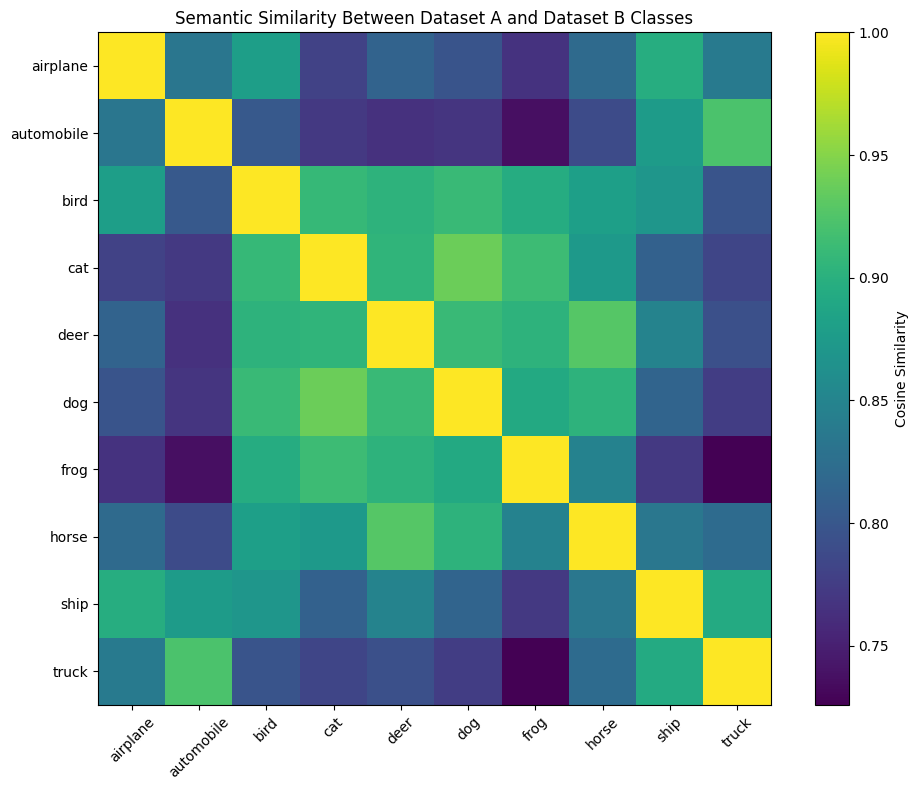

In [39]:

similarity_matrix = np.zeros((len(class_names), len(class_names)))

for i in range(len(class_names)):
    for j in range(len(class_names)):
        sim = cosine_similarity(
            class_embeddings[class_names[i]].reshape(1, -1),
            class_embeddings[class_names[j]].reshape(1, -1)
        )[0, 0]
        similarity_matrix[i, j] = sim

print("\nSemantic Similarity Score Matrix\n")
print("Classes:", class_names)
print(np.round(similarity_matrix, 3)) 


plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap="viridis")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.yticks(range(len(class_names)), class_names)
plt.colorbar(label="Cosine Similarity")
plt.title("Semantic Similarity Between Dataset A and Dataset B Classes")
plt.tight_layout()
plt.show()


EXP2


In [174]:
dataset_A2='/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL' #real 
dataset_B2='/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/FAKE' #fake

In [175]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images_from_folder(folder_path, target_size=(32,32), max_images=None):
    images = []
    files = os.listdir(folder_path)
    if max_images:
        files = files[:max_images]
    for fname in files:
        fpath = os.path.join(folder_path, fname)
        try:
            img = load_img(fpath, target_size=target_size)
            img_array = img_to_array(img)  # shape (H, W, 3), still 0–255
            img_array = img_array.astype(np.uint8)  # convert to integers
            images.append(img_array)
        except:
            continue
    return np.array(images, dtype=np.uint8)


dataset_A2 = load_images_from_folder(dataset_A2, max_images=200)
dataset_B2 = load_images_from_folder(dataset_B2, max_images=200)

print("Dataset A2 (real):", dataset_A2.shape, "dtype:", dataset_A2.dtype)
print("Dataset B2 (fake):", dataset_B2.shape, "dtype:", dataset_B2.dtype)


Dataset A2 (real): (200, 32, 32, 3) dtype: uint8
Dataset B2 (fake): (200, 32, 32, 3) dtype: uint8


In [176]:
dataset_A2[0]

array([[[102,  86,  63],
        [ 98,  83,  60],
        [ 88,  74,  48],
        ...,
        [ 91,  83,  46],
        [ 80,  75,  37],
        [ 86,  81,  43]],

       [[ 96,  80,  57],
        [ 92,  76,  53],
        [100,  86,  60],
        ...,
        [ 73,  65,  28],
        [ 63,  58,  20],
        [ 68,  63,  25]],

       [[111,  95,  72],
        [ 96,  80,  57],
        [112,  98,  72],
        ...,
        [ 70,  62,  25],
        [ 62,  57,  19],
        [ 63,  58,  20]],

       ...,

       [[142, 124,  86],
        [131, 113,  75],
        [ 87,  67,  32],
        ...,
        [200, 187, 155],
        [192, 179, 147],
        [178, 165, 133]],

       [[ 92,  74,  38],
        [104,  86,  50],
        [ 93,  73,  40],
        ...,
        [185, 172, 140],
        [173, 159, 130],
        [172, 158, 129]],

       [[ 93,  75,  39],
        [111,  93,  57],
        [110,  90,  57],
        ...,
        [183, 170, 138],
        [176, 162, 135],
        [182, 168, 141]]

In [177]:
E_A2 = get_embeddings(dataset_A2)  
E_B2 = get_embeddings(dataset_B2)  

# Cosine similarity matrix
similarity_matrix2 = cosine_similarity(E_A2, E_B2)


max_sim_A2 = similarity_matrix2.max(axis=1)

In [44]:
E_A2[0]

array([1.00747013e+00, 1.47214711e+00, 5.45298719e+00, 3.13929892e+00,
       6.61853313e+00, 0.00000000e+00, 1.37561250e+00, 1.19546294e+00,
       1.05003941e+00, 0.00000000e+00, 0.00000000e+00, 9.96067282e-03,
       3.36006570e+00, 4.48860317e-01, 0.00000000e+00, 0.00000000e+00,
       8.63156095e-03, 7.68417478e-01, 1.58027798e-01, 0.00000000e+00,
       3.02726924e-01, 0.00000000e+00, 5.03923930e-02, 4.06560414e-02,
       0.00000000e+00, 4.11756516e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.18543455e-02, 9.24257040e-01, 3.53614330e-01,
       2.12280250e+00, 7.31106043e-01, 0.00000000e+00, 0.00000000e+00,
       2.32719493e+00, 4.87982512e-01, 0.00000000e+00, 3.37655127e-01,
       0.00000000e+00, 3.40952463e-02, 7.07195163e-01, 1.26599884e-02,
       0.00000000e+00, 3.90708327e-01, 0.00000000e+00, 4.56169210e-02,
       1.12857139e+00, 3.77460480e-01, 0.00000000e+00, 0.00000000e+00,
       2.66023423e-03, 0.00000000e+00, 8.28753889e-01, 2.08689785e+00,
      

In [45]:

num_to_check = 5
for i in range(num_to_check):
    for j in range(num_to_check):
        sim = similarity_matrix2[i, j]
        print(f"Similarity between A[{i}] and B[{j}]: {sim:.4f}")


Similarity between A[0] and B[0]: 0.6232
Similarity between A[0] and B[1]: 0.4972
Similarity between A[0] and B[2]: 0.5623
Similarity between A[0] and B[3]: 0.6984
Similarity between A[0] and B[4]: 0.6111
Similarity between A[1] and B[0]: 0.6758
Similarity between A[1] and B[1]: 0.5788
Similarity between A[1] and B[2]: 0.6787
Similarity between A[1] and B[3]: 0.6874
Similarity between A[1] and B[4]: 0.6831
Similarity between A[2] and B[0]: 0.6258
Similarity between A[2] and B[1]: 0.5840
Similarity between A[2] and B[2]: 0.5722
Similarity between A[2] and B[3]: 0.7506
Similarity between A[2] and B[4]: 0.7028
Similarity between A[3] and B[0]: 0.6469
Similarity between A[3] and B[1]: 0.6070
Similarity between A[3] and B[2]: 0.5732
Similarity between A[3] and B[3]: 0.7828
Similarity between A[3] and B[4]: 0.7177
Similarity between A[4] and B[0]: 0.7216
Similarity between A[4] and B[1]: 0.5739
Similarity between A[4] and B[2]: 0.6811
Similarity between A[4] and B[3]: 0.7325
Similarity betwe

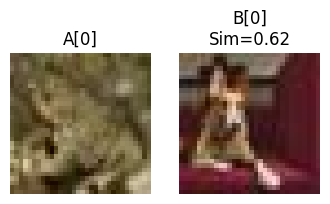

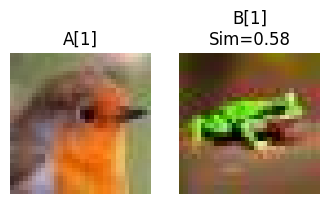

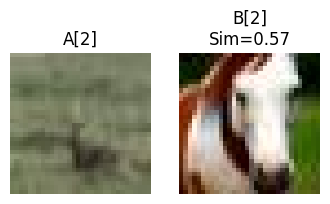

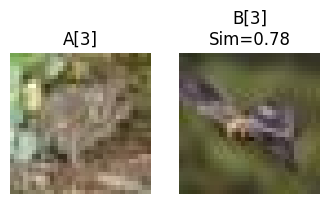

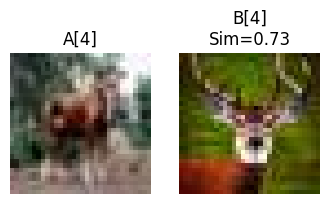

In [46]:
import matplotlib.pyplot as plt

for i in range(num_to_check):
    plt.figure(figsize=(4,2))
    
    # Dataset A image
    plt.subplot(1,2,1)
    plt.imshow(dataset_A2[i])
    plt.title(f"A[{i}]")
    plt.axis('off')
    
    # Dataset B image
    plt.subplot(1,2,2)
    plt.imshow(dataset_B2[i])
    plt.title(f"B[{i}]\nSim={similarity_matrix2[i,i]:.2f}")
    plt.axis('off')
    
    plt.show()


Below code is for finding best match image in in dataset B wth respect to A

In [47]:

best_match_indices = similarity_matrix2.argmax(axis=1) 
best_match_scores = similarity_matrix2.max(axis=1)      

for i, j in enumerate(best_match_indices):
    print(f"Image {i} in Dataset A best matches Image {j} in Dataset B with similarity {best_match_scores[i]:.4f}")


Image 0 in Dataset A best matches Image 31 in Dataset B with similarity 0.7573
Image 1 in Dataset A best matches Image 179 in Dataset B with similarity 0.7763
Image 2 in Dataset A best matches Image 15 in Dataset B with similarity 0.8110
Image 3 in Dataset A best matches Image 31 in Dataset B with similarity 0.8206
Image 4 in Dataset A best matches Image 150 in Dataset B with similarity 0.8110
Image 5 in Dataset A best matches Image 23 in Dataset B with similarity 0.7529
Image 6 in Dataset A best matches Image 199 in Dataset B with similarity 0.8338
Image 7 in Dataset A best matches Image 164 in Dataset B with similarity 0.8556
Image 8 in Dataset A best matches Image 141 in Dataset B with similarity 0.7850
Image 9 in Dataset A best matches Image 150 in Dataset B with similarity 0.8366
Image 10 in Dataset A best matches Image 28 in Dataset B with similarity 0.8413
Image 11 in Dataset A best matches Image 157 in Dataset B with similarity 0.8336
Image 12 in Dataset A best matches Image 30

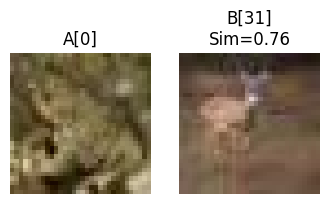

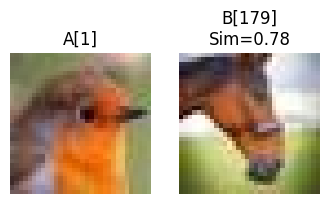

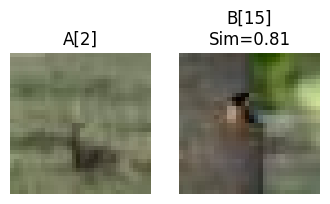

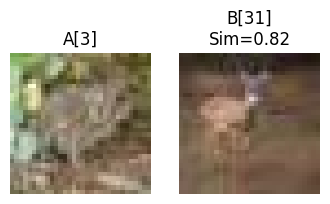

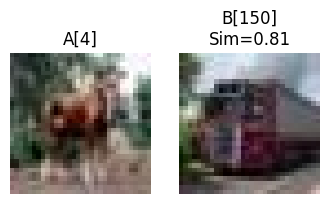

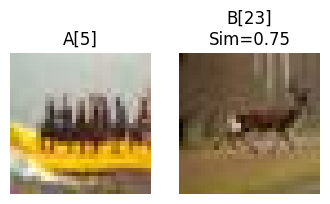

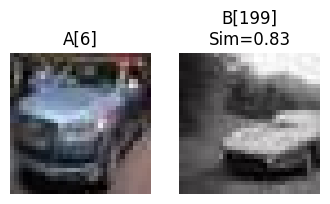

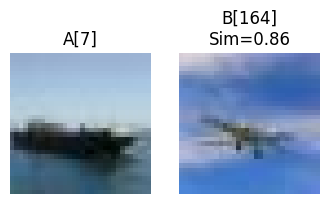

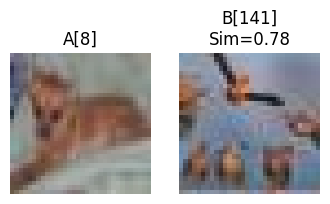

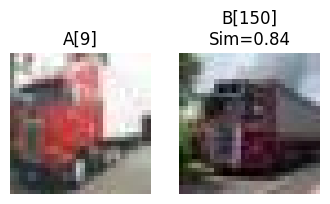

In [48]:


num_to_show = 10  
for i in range(num_to_show):
    j = best_match_indices[i]
    
    plt.figure(figsize=(4,2))
    
    # Dataset A image
    plt.subplot(1,2,1)
    plt.imshow(dataset_A2[i])
    plt.title(f"A[{i}]")
    plt.axis('off')
    
    # Dataset B image (best match)
    plt.subplot(1,2,2)
    plt.imshow(dataset_B2[j])
    plt.title(f"B[{j}]\nSim={best_match_scores[i]:.2f}")
    plt.axis('off')
    
    plt.show()
